In [1]:
from ml_config import *

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [5]:
from sklearn.metrics import *

In [6]:
target_names = ['setosa','versicolor','virginica']
cls_matrix = classification_report(y,qda.predict(X), target_names=target_names)
print(cls_matrix)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.98      0.96      0.97        50
  virginica       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



In [7]:
cfs_matrix = confusion_matrix(y,qda.predict(X))
print(cfs_matrix)

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
y1_index = y != 0
y1_idx = y==0
y1 = y.copy()
y1[y1_index] = 1
y1[y1_idx] = 0
model1 = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y1)

y2_index = y != 1
y2_idx = y==1
y2 = y.copy()
y2[y2_index] = 1
y2[y2_idx] = 0
model2 = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y2)

y3_index = y != 2
y3_idx = y==2
y3 = y.copy()
y3[y3_index] = 1
y3[y3_idx] = 0
model3 = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y3)

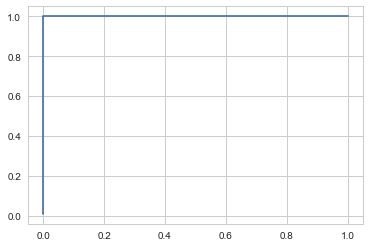

In [10]:
fpr1, tpr1, thresholds1 = roc_curve(y1,model1.decision_function(X))
plt.plot(fpr1, tpr1, label="No class 1")
plt.show()

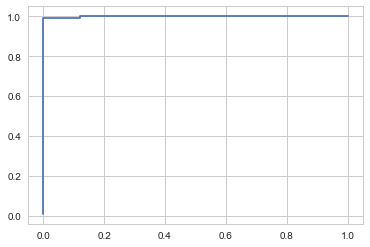

In [11]:
fpr2, tpr2, thresholds2 = roc_curve(y2,model2.decision_function(X))
plt.plot(fpr2, tpr2, label="No class 1")
plt.show()

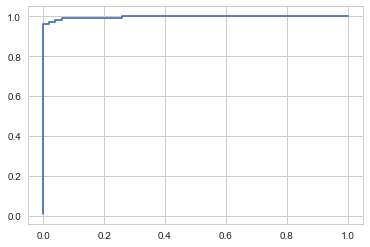

In [12]:
fpr3, tpr3, thresholds3 = roc_curve(y3,model3.decision_function(X))
plt.plot(fpr3, tpr3, label="No class 2")

plt.show()

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3, 
                                 solver="svd", store_covariance=True).fit(X, y)

In [14]:
target_names = ['setosa','versicolor','virginica']
cls_matrix = classification_report(y,lda.predict(X), target_names=target_names)
print(cls_matrix)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        50
 versicolor       0.98      0.96      0.97        50
  virginica       0.96      0.98      0.97        50

avg / total       0.98      0.98      0.98       150



In [15]:
cfs_matrix = confusion_matrix(y,qda.predict(X))
print(cfs_matrix)

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


In [16]:
y1_index = y != 0
y1_idx = y==0
y1 = y.copy()
y1[y1_index] = 1
y1[y1_idx] = 0
model1 = LinearDiscriminantAnalysis(n_components=2, 
                                 solver="svd", store_covariance=True).fit(X, y1)

y2_index = y != 1
y2_idx = y==1
y2 = y.copy()
y2[y2_index] = 1
y2[y2_idx] = 0
model2 = LinearDiscriminantAnalysis(n_components=2, 
                                 solver="svd", store_covariance=True).fit(X, y2)

y3_index = y != 2
y3_idx = y==2
y3 = y.copy()
y3[y3_index] = 1
y3[y3_idx] = 0
model3 = LinearDiscriminantAnalysis(n_components=2, 
                                 solver="svd", store_covariance=True).fit(X, y3)

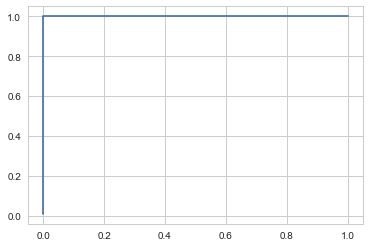

In [17]:
fpr1, tpr1, thresholds1 = roc_curve(y1,model1.decision_function(X))
plt.plot(fpr1, tpr1, label="No class 1")
plt.show()

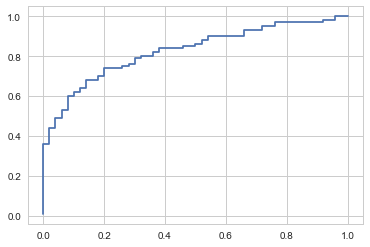

In [18]:
fpr2, tpr2, thresholds2 = roc_curve(y2,model2.decision_function(X))
plt.plot(fpr2, tpr2, label="No class 1")
plt.show()

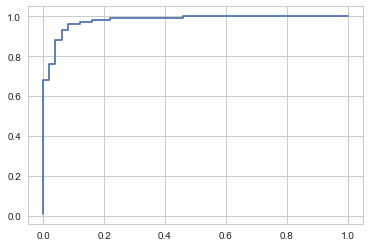

In [19]:
fpr3, tpr3, thresholds3 = roc_curve(y3,model3.decision_function(X))
plt.plot(fpr3, tpr3, label="No class 2")

plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])